In [1]:
import os

In [2]:
print("Current Directory:", os.getcwd())

Current Directory: C:\Users\Abuova_Aida


In [3]:
os.chdir(r"C:\Users\Abuova_Aida\Desktop\CfE Final Project")

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv(r"C:\Users\Abuova_Aida\Desktop\CfE Final Project\airbnb_london_listing.csv")

C:\Users\Abuova_Aida\AppData\Local\Temp\ipykernel_9788\597361849.py:1: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\Abuova_Aida\Desktop\CfE Final Project\airbnb_london_listing.csv")


In [6]:
columns_to_normalize = ['bathrooms', 'bedrooms']    
for column in columns_to_normalize:
    min_val = data[column].min()
    max_val = data[column].max()
    data[column] = (data[column] - min_val) / (max_val - min_val)
print("Normalized DataFrame:")
print(data)

Normalized DataFrame:
       Unnamed: 0        id       scrape_id    host_id   host_name  \
0               1  15896822  20170304065726   69018624      Dafina   
1               2   4836957  20170304065726   18154504        Anas   
2               3  13355982  20170304065726   75741819       Maria   
3               4  13472704  20170304065726   77078182      Hannah   
4               5  17430865  20170304065726  113972982  Jung Kyung   
...           ...       ...             ...        ...         ...   
53899       53900  14565735  20170304065726   59310710     Angelos   
53900       53901   7312985  20170304065726   38314213        Paul   
53901       53902  17248546  20170304065726   29211630      Junior   
53902       53903  17184388  20170304065726  115648419         Dee   
53903       53904  17215094  20170304065726   51762442       Lance   

       host_since host_response_rate  host_acceptance_rate host_is_superhost  \
0      2016-04-26               100%                   Na

In [7]:
avg_bedrooms = data['bedrooms'].mean()
avg_beds = data['beds'].mean()
avg_accommodates = data['accommodates'].mean()
summary_stats = {
    'Metric': ['Mean', 'Median', 'Standard Deviation'],
    'Average Bedrooms': [data['bedrooms'].mean(), data['bedrooms'].median(), data['bedrooms'].std()],
    'Average Beds': [data['beds'].mean(), data['beds'].median(), data['beds'].std()], 
    'Average Accommodates': [data['accommodates'].mean(), data['accommodates'].median(), data['accommodates'].std()],
}
summary_table = pd.DataFrame(summary_stats)
print("Summary Statistics Table:")
print(summary_table)

Summary Statistics Table:
               Metric  Average Bedrooms  Average Beds  Average Accommodates
0                Mean          0.135398      1.708027              3.036676
1              Median          0.100000      1.000000              2.000000
2  Standard Deviation          0.084191      1.201165              1.907429


In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [10]:
import pandas as pd

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

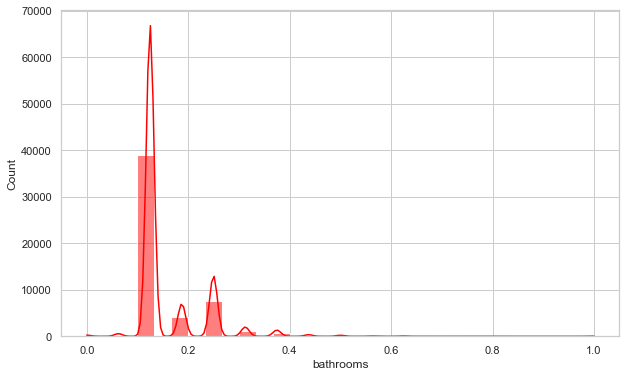

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data['bathrooms'], bins=30, kde=True, color='red')

In [12]:
import numpy as np

In [13]:
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values>0])
print("Data types:")
print(data.dtypes)

Missing values in each column:
host_name                           9
host_since                          9
host_response_rate              13380
host_acceptance_rate            53904
host_is_superhost                   9
host_neighbourhood              13107
host_listings_count                 9
host_total_listings_count           9
host_has_profile_pic                9
host_identity_verified              9
neighbourhood                   17984
neighbourhood_group_cleansed    53904
city                               21
state                           24774
zipcode                          1362
market                           1491
bathrooms                         260
bedrooms                           93
beds                              173
square_feet                     53322
weekly_price                    42162
monthly_price                   45269
security_deposit                30230
cleaning_fee                    21421
has_availability                53904
first_review       

In [14]:
price_threshold_low = 100
price_threshold_high = 500
data['hashtags'] = data.apply(lambda row: ", ".join([
    "#Superhost" if row['host_is_superhost'] == 't' else "",
    "#EntirePlace" if row['room_type'] == "Entire home/apt" else "",
    "#GreatLocation" if pd.notnull(row['review_scores_location']) and row['review_scores_location'] >= 9 else ""
]).replace(", ,", "").strip(", "), axis=1)

In [15]:
data['hashtags'].tail()

53899                
53900    #EntirePlace
53901    #EntirePlace
53902    #EntirePlace
53903                
Name: hashtags, dtype: object

In [16]:
data1 = pd.DataFrame({
    'accommodates': range(17)
})

print(data1)
print(data1.dtypes)

filtered_data1 = data.query("availability_365 >= 180")

print("Filtered data by number of beds:")
print(filtered_data1.head())

    accommodates
0              0
1              1
2              2
3              3
4              4
5              5
6              6
7              7
8              8
9              9
10            10
11            11
12            12
13            13
14            14
15            15
16            16
accommodates    int64
dtype: object
Filtered data by number of beds:
    Unnamed: 0        id       scrape_id   host_id host_name  host_since  \
1            2   4836957  20170304065726  18154504      Anas  2014-07-15   
7            8  12296555  20170304065726  33096320   Sabrina  2015-05-11   
10          11    735298  20170304065726   3822323     Julia  2012-10-10   
12          13   5344655  20170304065726  27697324      Jean  2015-02-13   
13          14  14912894  20170304065726  72718519    Leanne  2016-05-18   

   host_response_rate  host_acceptance_rate host_is_superhost  \
1                100%                   NaN                 f   
7                 90%                 